## load required modules

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import numpy as np
import matplotlib.pyplot as plt


## load data

In [2]:
fashmnist= tf.keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels)=fashmnist.load_data()

## visulaize data

In [3]:
print(train_images.shape)
print(len(train_labels))
print(test_images.shape)
print(len(test_labels))


(60000, 28, 28)
60000
(10000, 28, 28)
10000


In [4]:
print(test_labels)

[9 2 1 ... 8 1 5]


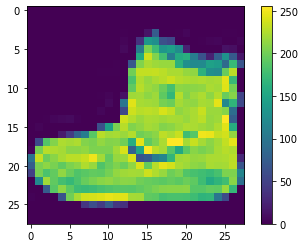

In [5]:
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

## preprocessing

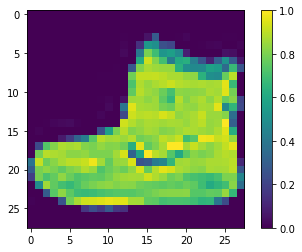

In [6]:
train_images, test_images=train_images/255.0, test_images/255.0
plt.figure
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

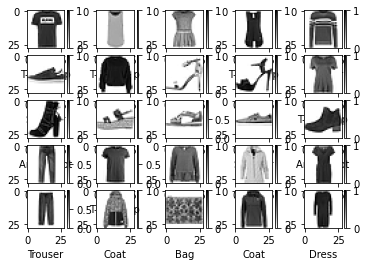

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i+1],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+1]])
    plt.colorbar()
plt.show()
    

## build the model

In [8]:
model =Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(10)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## compile model

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## training 

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4977 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3741 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3373 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3123 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2956 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2814 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2684 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2478 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.238

## evalute model

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3371 - accuracy: 0.8794 - 509ms/epoch - 2ms/step

Test accuracy: 0.8794000148773193


## prediction

In [13]:
probability_prediction=Sequential([model, tf.keras.layers.Softmax()])

In [14]:
pred=probability_prediction.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [15]:
pred[0]
prediction=np.argmax(pred[0])
print("Predicted Label is ",prediction)
print("True Label is " , test_labels[0])

Predicted Label is  9
True Label is  9


## varify predictions

In [39]:
def plotpred(i,prediction, true_labels, imgs ):
    predic=np.argmax(prediction)
    true_label=true_labels[i]
    img=imgs[i]
    plt.imshow(img,cmap=plt.cm.binary)
    if  predic == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(class_names[true_labels[i]])

    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    print(predictions_array)
    thisplot = plt.bar(range(10), predictions_array, color="black")
    plt.ylim([1e-08, 1])
    plt.xlim([0, 9])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

[8.8916586e-06 8.5572815e-08 4.1623607e-06 2.9726289e-06 6.2184074e-07
 5.0666267e-01 9.7922998e-07 4.2344487e-01 6.9873407e-02 1.3487276e-06]


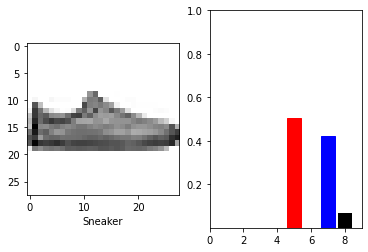

In [40]:
i = 12
plt.subplot(1,2,1)
plotpred(i, pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_labels)
plt.show()

## use train model

(28, 28)
(1, 28, 28)


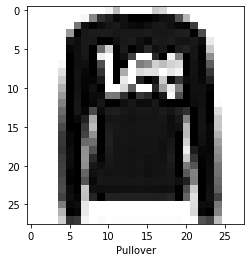

In [48]:
test=test_images[1]
plt.imshow(test, cmap=plt.cm.binary)
print(test.shape)
test = (np.expand_dims(test,0))
plt.xlabel(class_names[test_labels[1]])
print(test.shape)

In [68]:
pred=probability_prediction.predict(test)
print(pred)
prediction=np.argmax(pred)
print("Predicted Label is ",prediction)
print("True Label is " , test_labels[1])


1/1 [==============================] - 0s 20ms/step
[[2.3266686e-05 5.7274789e-14 9.8920351e-01 2.9987100e-11 9.6454425e-03
  2.5361838e-10 1.1277848e-03 1.8962726e-15 7.8102219e-10 2.0458926e-13]]
Predicted Label is  2
True Label is  2
